# HDT 3
 Marlon Tzorin - 20180072

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('satgpa.csv')

In [3]:
data.head(5)

,sex,sat_v,sat_m,sat_sum,hs_gpa,fy_gpa
0,1,65,62,127,3.40,3.18
1,2,58,64,122,4.00,3.33
2,2,56,60,116,3.75,3.25
3,1,42,53,95,3.75,2.42
4,1,55,52,107,4.00,2.63


### Data Wrangling

In [4]:
data = data.assign(MatrixIdentidad = 1)
data['sex'] = data['sex'].replace(2,0)

In [5]:
data.head(5)

,sex,sat_v,sat_m,sat_sum,hs_gpa,fy_gpa,MatrixIdentidad
0,1,65,62,127,3.40,3.18,1
1,0,58,64,122,4.00,3.33,1
2,0,56,60,116,3.75,3.25,1
3,1,42,53,95,3.75,2.42,1
4,1,55,52,107,4.00,2.63,1


### X & Y

In [7]:
y = data[['fy_gpa']].to_numpy()
x = data[['sex', 'sat_v', 'sat_m', 'hs_gpa', 'MatrixIdentidad']].to_numpy()

### Funciones Costo

In [8]:
def linear_cost(X, y, theta): 
    h = X @ theta
    return ((y-h)**2).sum() / (2 * len(X))

def linear_cost_gradient(X, y, theta): 
    h = X @ theta
    return (X.T @ (h-y))/ len(X)

### Thetas

In [10]:
m, n = x.shape
theta_0 = np.random.rand(n,1)

### Funcion Gradiente

In [12]:

def gradient_descent(
X,y,theta_0,linear_cost,linear_cost_gradient,
    learning_rate = 0.00001, threshold=0.001, max_iter=10000): 
    
    thetas = theta_0
    iteration = 0 
    costs = []
    
    while np.linalg.norm(linear_cost_gradient(X,y,thetas)) > threshold and iteration < max_iter:
        iteration += 1 
        thetas = thetas - (learning_rate * linear_cost_gradient(X,y,thetas))
        costs.append(linear_cost(X,y,thetas))
        
    return thetas, costs

thetas, costs = gradient_descent(x,y,theta_0,linear_cost,linear_cost_gradient)

### Gráficas

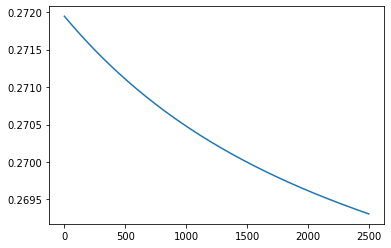

In [17]:
plt.plot(costs[7500:10000])

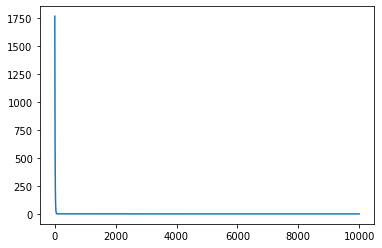

In [18]:
plt.plot(costs)

In [19]:
thetas

array([[ 0.64375563],
       [ 0.0017711 ],
       [-0.01486909],
       [ 0.64022734],
       [ 0.84228863]])